In [108]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [109]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=3, cluster_std=0.5, random_state=0)

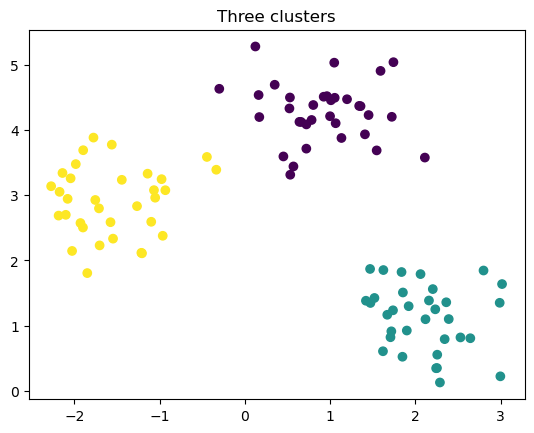

In [110]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.title("Three clusters")
plt.show()

In [111]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [112]:
from sklearn.cluster import KMeans

In [113]:
inertia = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit_transform(X)
    inertia.append(km.inertia_)

In [114]:
inertia 

[443.79813518213234,
 181.54748813634797,
 48.2352051252198,
 41.52027305853292,
 39.04531213854614,
 33.04358418468577,
 27.21582749081525,
 24.58716488635054,
 19.774588683617836]

In [115]:
l = [i for i in range(1,10)]
l

[1, 2, 3, 4, 5, 6, 7, 8, 9]

<Axes: >

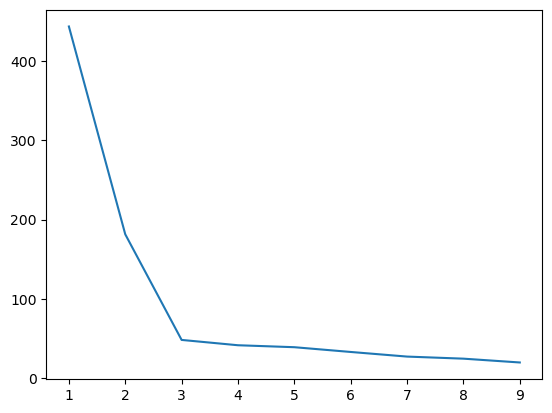

In [116]:
sns.lineplot(x=l,y=inertia)

In [117]:
from sklearn.metrics import silhouette_score

In [118]:
proper_cluster_score  = []
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    labels = km.labels_
    proper_cluster_score.append(silhouette_score(X,labels))

In [119]:
proper_cluster_score

[0.5702978671852779,
 0.6933016797323996,
 0.5707109920894341,
 0.4298667209041663,
 0.3380165236475893,
 0.3254927988057678,
 0.4705936911321,
 0.34738963047582916]

In [120]:
l = [i for i in range(2,10)]

<Axes: >

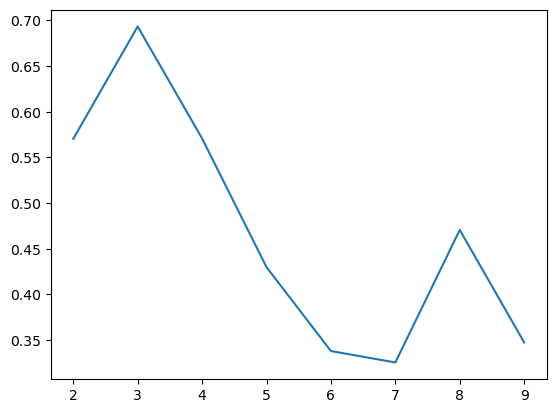

In [121]:
sns.lineplot(x=l,y=proper_cluster_score)

- The corresponding value of y-axis represents silhouette score and x-axis represents number of clusters, higher the score optimum the clusters are

- ----------------------------

### Calculating same values for a data that is not clustered properly 

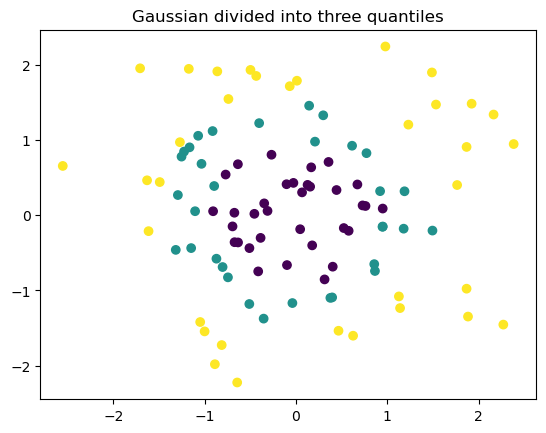

In [122]:
from sklearn.datasets import make_gaussian_quantiles

X, Y = make_gaussian_quantiles(n_features=2, n_classes=3, random_state=0)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.title("Gaussian divided into three quantiles")
plt.show()

In [123]:
print(X.shape)
print(y.shape)

(100, 2)
(100,)


In [124]:
inertia = []
for i in range(1,10):
    km = KMeans(n_clusters=i)
    km.fit_transform(X)
    inertia.append(km.inertia_)

In [125]:
inertia

[207.62788756811253,
 138.6651663344421,
 88.25033835003268,
 65.15224878865597,
 54.624986732329,
 41.6823475336882,
 34.299457082083485,
 30.668071088175893,
 26.255777607977947]

In [126]:
l = [i for i in range(1,10)]
l

[1, 2, 3, 4, 5, 6, 7, 8, 9]

<Axes: >

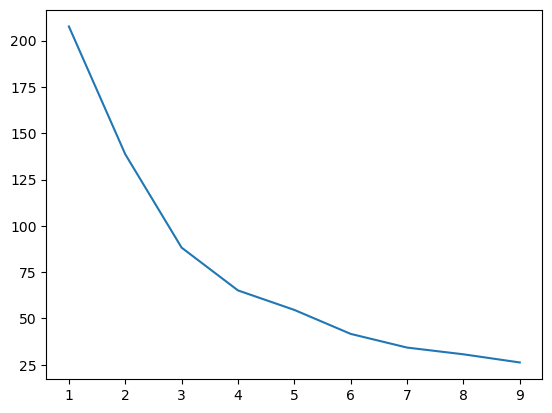

In [127]:
sns.lineplot(x=l,y=inertia)

In [128]:
random_clusters_score  = []
for i in range(2,10):
    km = KMeans(n_clusters=i)
    km.fit(X)
    labels = km.labels_
    random_clusters_score.append(silhouette_score(X,labels))

In [129]:
random_clusters_score

[0.30226770492476496,
 0.3386453109375303,
 0.34599507572156696,
 0.32387687020463757,
 0.3492672516991249,
 0.3516895524768788,
 0.36835917712041016,
 0.38035184529208343]

In [132]:
l_1 = [i for i in range(1,10)]

In [142]:
l_2 = [i for i in range(2,10)]

<Axes: >

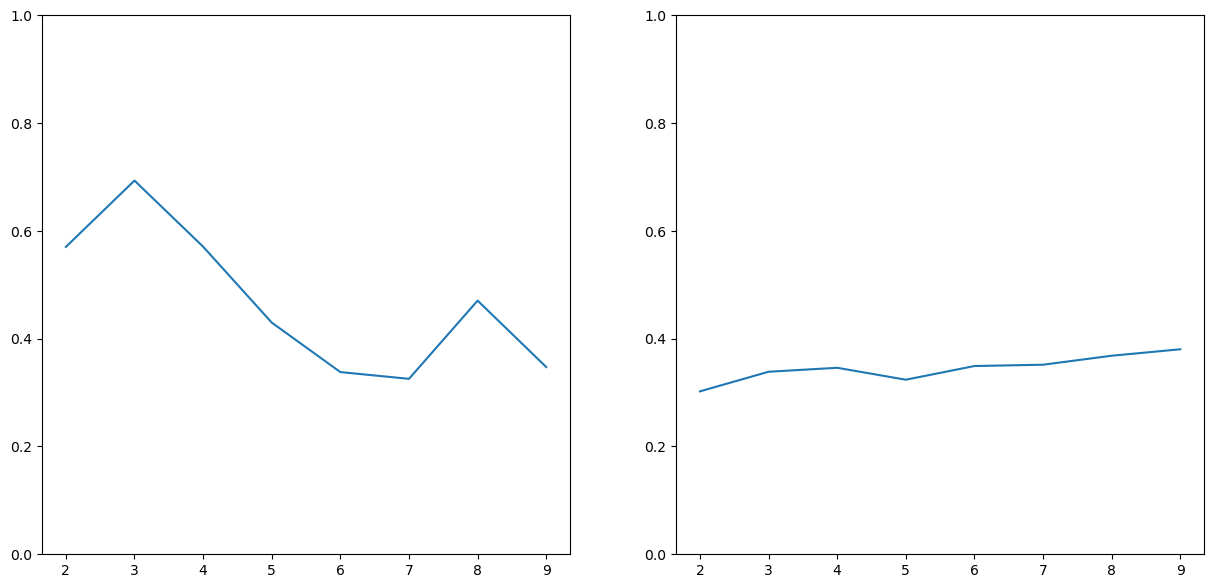

In [151]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.ylim(0,1)
sns.lineplot(x=l,y=proper_cluster_score)
plt.subplot(1,2,2)
plt.ylim(0,1)
sns.lineplot(x=l_2,y=random_clusters_score)


# Final Observation
- Observe how the shillote score differs for properly clustered data and not properly clustered data
- We could have used some other clustering algorithm to cluster the second data properly, but the ultimate goal was just to see how "silhouette_score" differs if data points are clustered properly and not clustered properly